## 前情函数
大部分函数与操作的解释在 Lecture_2_tensorflow1.x.ipynb 中解释过，这里仅解释少量函数
#### pandas 的 head & detail  
head：用于显示前几行数据  
tail：用于显示后几行数据

In [1]:
import pandas as pd


demo_frame = pd.read_csv('./data/demo.csv')

In [2]:
demo_frame.head(2)

,title A,title A.1,title A.2
0,title B,title B,title B
1,title C,title C,title C


In [3]:
demo_frame.head(1)

,title A,title A.1,title A.2
0,title B,title B,title B


In [4]:
demo_frame.tail(1)

,title A,title A.1,title A.2
1,title C,title C,title C


In [5]:
demo_frame.tail(2)

,title A,title A.1,title A.2
0,title B,title B,title B
1,title C,title C,title C


## 正式开始
#### 导入必要的包

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
import os


tf.__version__

'2.0.0'

### 数据预处理

#### 读取数据并转换为 numpy array 格式

In [7]:
data_frame = pd.read_csv('./data/boston.csv')

In [8]:
data_frame = data_frame.values

In [9]:
data_frame

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 7.8800e+00,
        1.1900e+01]])

#### 获取数据集

In [10]:
x_data = data_frame[:, :12]
y_data = data_frame[:, 12]

In [11]:
print('x_data:\n', x_data, '\n x_data shape:', x_data.shape,
      '\ny_data:\n', y_data, '\n y_data shape:', y_data.shape)

x_data:
 [[6.3200e-03 1.8000e+01 2.3100e+00 ... 2.9600e+02 1.5300e+01 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 2.4200e+02 1.7800e+01 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 2.4200e+02 1.7800e+01 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 7.8800e+00]] 
 x_data shape: (506, 12) 
y_data:
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.

#### 划分数据集：训练集、验证集、测试集

In [12]:
train_num = 300
valid_num = 100
test_num = len(x_data) - train_num - valid_num

x_train = x_data[:train_num]
y_train = y_data[:train_num]

x_valid = x_data[train_num:train_num + valid_num]
y_valid = y_data[train_num:train_num + valid_num]

x_test = x_data[train_num + valid_num:train_num + valid_num + test_num]
y_test = y_data[train_num + valid_num:train_num + valid_num + test_num]

数据格式转换 tf.float32，便于使用 tensorflow 进行矩阵运算  
数据仍然需要归一化，使用 1.x 版本方式归一化如下  
`for i in range(data_frame.shape[1] - 1):  
     data_frame[:, i] = data_frame[:, i] / (data_frame[:, i].max() - data_frame[:, i].min())  
x_train = tf.cast(x_train, dtype=tf.float32)  
x_valid = tf.cast(x_valid, dtype=tf.float32)  
x_test = tf.cast(x_test, dtype=tf.float32)`  
但在 2.x 版本中我们使用 sklearn 的 preprocessing 下的 scale 函数进  
行归一化，归一化方式如下，由选取值减去均值再除以方差  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$x_i^`=$
${x_i-mean(x)\over std(x)}$  

代码如下

In [13]:
x_train = tf.cast(scale(x_train), dtype=tf.float32)
x_valid = tf.cast(scale(x_valid), dtype=tf.float32)
x_test = tf.cast(scale(x_test), dtype=tf.float32)

### 模型构建
#### 定义模型

In [14]:
def model(x, w, b):
    return tf.matmul(x, w) + b

#### 定义损失函数

In [15]:
def loss(x, y, w, b):
    err = model(x, w, b) - y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err)

#### 定义梯度计算函数

In [16]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

#### 创建变量

In [17]:
W = tf.Variable(tf.random.normal([12, 1], mean=0.0, stddev=1.0, dtype=tf.float32), name='W')
B = tf.Variable(tf.zeros(1), dtype=tf.float32, name='B')

In [18]:
print(W), print(B)

<tf.Variable 'W:0' shape=(12, 1) dtype=float32, numpy=
array([[ 2.1337633 ],
       [-1.5243678 ],
       [ 1.7605773 ],
       [-0.7097536 ],
       [-0.36367252],
       [-0.33473644],
       [ 0.24133514],
       [ 0.4708158 ],
       [-0.41538587],
       [-1.6086105 ],
       [ 0.9806768 ],
       [-1.5247517 ]], dtype=float32)>
<tf.Variable 'B:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


(None, None)

### 模型训练
#### 设置训练参数

In [19]:
epochs = 50
learning_rate = 0.001
batch_size = 10

#### 定义优化器

In [20]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

#### 开始训练

In [21]:
loss_list_train = []
loss_list_valid = []
total_step = int(train_num / batch_size)

for epoch in range(epochs):
    for step in range(total_step):
        xs = x_train[step * batch_size:(step + 1) * batch_size, :]
        ys = y_train[step * batch_size:(step + 1) * batch_size]
        
        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))
        
    loss_train = loss(x_train, y_train, W, B).numpy()
    loss_valid = loss(x_valid, y_valid, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print('epoch={:2d}/{:2d}, train_loss={:.4f}, valid_loss={:.4f}'.format(epoch + 1, epochs, loss_train, loss_valid))

epoch= 1/50, train_loss=661.1297, valid_loss=464.9688
epoch= 2/50, train_loss=595.2870, valid_loss=413.7663
epoch= 3/50, train_loss=538.2567, valid_loss=370.4808
epoch= 4/50, train_loss=488.3504, valid_loss=333.3396
epoch= 5/50, train_loss=444.4039, valid_loss=301.1965
epoch= 6/50, train_loss=405.5635, valid_loss=273.2603
epoch= 7/50, train_loss=371.1657, valid_loss=248.9457
epoch= 8/50, train_loss=340.6702, valid_loss=227.7911
epoch= 9/50, train_loss=313.6215, valid_loss=209.4145
epoch=10/50, train_loss=289.6269, valid_loss=193.4886
epoch=11/50, train_loss=268.3423, valid_loss=179.7267
epoch=12/50, train_loss=249.4640, valid_loss=167.8750
epoch=13/50, train_loss=232.7226, valid_loss=157.7073
epoch=14/50, train_loss=217.8788, valid_loss=149.0217
epoch=15/50, train_loss=204.7192, valid_loss=141.6380
epoch=16/50, train_loss=193.0545, valid_loss=135.3952
epoch=17/50, train_loss=182.7158, valid_loss=130.1506
epoch=18/50, train_loss=173.5531, valid_loss=125.7768
epoch=19/50, train_loss=165.

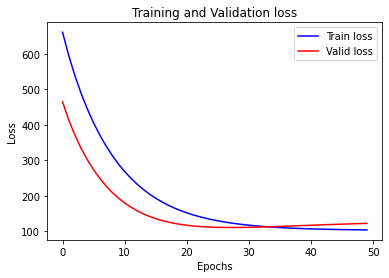

In [22]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_list_train, 'blue', label='Train loss')
plt.plot(loss_list_valid, 'red', label='Valid loss')
plt.legend(loc='best')
plt.title('Training and Validation loss')
plt.show()

#### 查看测试集 loss 值

In [23]:
print('Test_loss:{:.4f}'.format(loss(x_test, y_test, W, B).numpy()))

Test_loss:114.7464


In [24]:
choose_n = np.random.randint(test_num)

y = y_test[choose_n]

print('The data in boston.csv is the line:', choose_n + 402)
predict = model(x_test, W, B)[choose_n]
predict = tf.reshape(predict, ()).numpy()
print('Predict value:%f' % predict)
print('Target  value:%f' % y)

The data in boston.csv is the line: 488
Predict value:25.224939
Target  value:19.100000
